# 4.2 Excercise Predicting Fuel Efficiency

In [73]:
# Load the dataset as a Pandas data frame.

import pandas as pd

autompg = pd.read_csv(r"C:\Users\Riaz\Desktop\MSDS\Data Mining\Week 4\auto-mpg.csv")

# Required libraries are imported and using the read_csv function the dataframe has been loaded.
# Getting the column names and the number of rows

autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Prepping the data for modeling

In [74]:
# Dropping the column "car name" using the drop function,

autompg_drop=autompg.drop(columns=['car name'])
print ("The data type of horsepower column is \n",autompg_drop['horsepower'].dtype)

print ("Following are the value counts of horsepower column \n", autompg_drop['horsepower'].value_counts(),'\n')
print ("Following are the unique values of horsepower column \n", autompg_drop['horsepower'].unique(),'\n')

The data type of horsepower column is 
 object
Following are the value counts of horsepower column 
 horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64 

Following are the unique values of horsepower column 
 ['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82'] 



When we saw the unique values, we were able to see "?" character in the values.  That is the reason of the wrong data type.
Replacing the "?" character to mean value.

In [75]:
import numpy as np

# Replacing the ? with nan and calculating the mean value of horsepower column

autompg_drop['horsepower']=autompg_drop['horsepower'].replace('?',np.nan)
print ("The mean value of horsepower column is\n",autompg_drop['horsepower'].astype(float).mean())

# Using fillna and populating the value of nan with the mean

autompg_drop['horsepower']=autompg_drop['horsepower'].fillna(autompg_drop['horsepower'].astype(float).mean())

# Converting the horsepower column to integer type

autompg_drop['horsepower']=autompg_drop['horsepower'].astype('int')


The mean value of horsepower column is
 104.46938775510205


In [76]:
# Creating dummy variables for origin column using labelbinarizer method

from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer


# Create one-hot encoder
one_hot = LabelBinarizer()

# One-hot encode feature for the origin column
one_hot_fitted = one_hot.fit_transform(autompg_drop['origin'])

# Convert it to dataframe

autompg_drop_onehot = pd.DataFrame(one_hot_fitted, columns=one_hot.classes_)

# Concatenate to the existing dataframe,

autompg_drop_concat = pd.concat([autompg_drop,autompg_drop_onehot],axis=1)

print ("The correlation matrix is \n")
autompg_drop_concat.corr()

The correlation matrix is 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,1,2,3
mpg,1.000000,-0.775396,-0.804203,-0.771543,-0.831741,0.420289,0.579267,0.563450,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.839061,0.896017,-0.505419,-0.348746,-0.562543,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893760,0.932824,-0.543684,-0.370164,-0.609409,0.651407,-0.373886,-0.433505
horsepower,-0.771543,0.839061,0.893760,1.000000,0.860676,-0.684376,-0.411750,-0.453613,0.486067,-0.281334,-0.321232
weight,-0.831741,0.896017,0.932824,0.860676,1.000000,-0.417457,-0.306564,-0.581024,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684376,-0.417457,1.000000,0.288137,0.205873,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411750,-0.306564,0.288137,1.000000,0.180662,-0.139883,-0.024489,0.193101
origin,0.563450,-0.562543,-0.609409,-0.453613,-0.581024,0.205873,0.180662,1.000000,-0.924486,0.246332,0.886596
1,-0.568192,0.604351,0.651407,0.486067,0.598398,-0.250806,-0.139883,-0.924486,1.000000,-0.597198,-0.643317
2,0.259022,-0.352861,-0.373886,-0.281334,-0.298843,0.204473,-0.024489,0.246332,-0.597198,1.000000,-0.229895


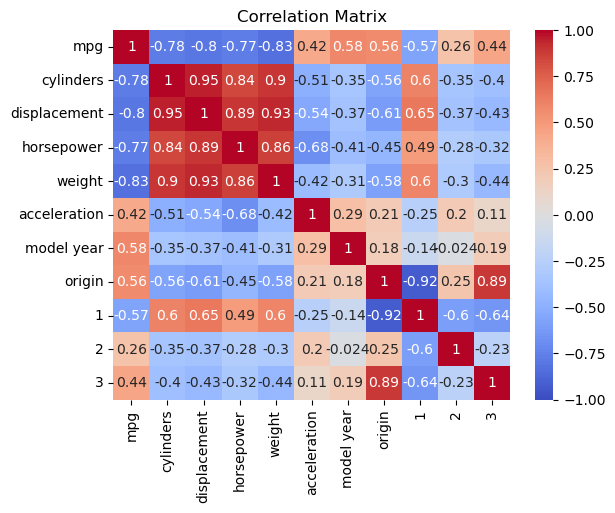

In [77]:
# Using sns and plotting the heatmap

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(autompg_drop_concat.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

As seen from the above correlation matrix, the cylinders,displacement,housepower and weight are seen as more negatively correlated with mpg.  Which means that if these variables increase the mpg decreases.  


The variables model year and origin are positively correlated, but its not a strong correlation.

Text(0, 0.5, 'Weight')

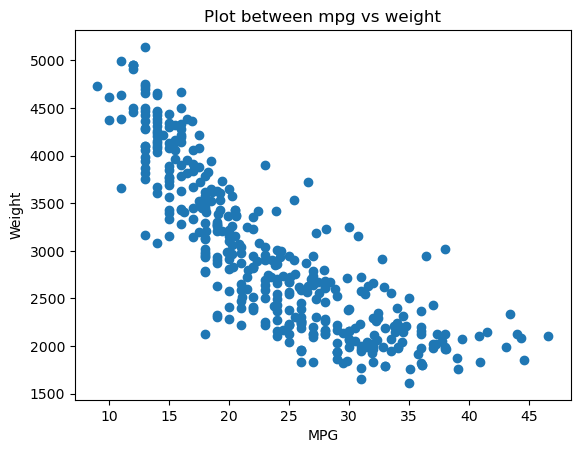

In [78]:
# Plotting between mpg vs weight using matplotlib

plt.scatter(autompg_drop_concat['mpg'],autompg_drop_concat['weight'])
plt.title('Plot between mpg vs weight')
plt.xlabel('MPG')
plt.ylabel('Weight')

As seen from the above plot, if the weight is more then mpg is less, meaning negative correlation.  
This corresponds to our earlier find using correlation matrix as the value is -0.83 which is significantly negative correlated.  

In [79]:
# Randomly split the data into 80% training data and 20% test data

from sklearn.model_selection import train_test_split

# Using the train_test_split function we are passing the dataframe and the target which is the mpg and mentioning the 
# test size as 0.2 meaning 20%.

autompg_drop_concat_train, autompg_drop_concat_test, mpg_train, mpg_test = train_test_split(autompg_drop_concat[['cylinders','displacement','horsepower','weight','acceleration','model year',1,2,3]], autompg_drop_concat['mpg'], test_size=0.2, random_state=42)

# Converting the column type to string and reassigning back to the dataframe,

autompg_drop_concat_train.columns=autompg_drop_concat_train.columns.astype(str)
autompg_drop_concat_test.columns=autompg_drop_concat_test.columns.astype(str)


In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Creating the model
model = LinearRegression()

# Training the model on the train dataset
model.fit(autompg_drop_concat_train, mpg_train)

# Predictions using the model on test set
# Passing the test dataset for prediction
mpg_pred = model.predict(autompg_drop_concat_test)

print ("The predicted values using model from the test data are\n",mpg_pred)

The predicted values using model from the test data are
 [32.46979408 29.21820565 21.22981838 16.83293342 12.34570443 26.58637957
 27.57784696 10.08749635 16.63531155 21.61942231 13.03644848 35.86857855
 24.54679844 13.53755835 23.51495672  6.26584571 29.15918973 24.7394909
 16.73130623 36.00989431 24.70654176 18.57884739 28.87258918 28.28888008
 14.91689244 36.00803492 26.45248921 24.56500042 21.92854031  8.84740636
 28.13013234 36.25083405 20.86681391 25.47421517 33.86322712 12.22484244
 22.50074718 21.94176531 12.15468938 27.7720229  26.01748666 28.4839526
 20.98405993  7.10597771 23.89913693 34.73985451 27.85819716 25.20551466
 23.38937707 28.57513021 22.1669562  33.2593159  32.3083373  11.13451833
 27.54043525 10.13807288 20.12321254 29.50934376 22.6881948  20.23322376
 16.36682171 31.64976987 23.54914671 21.33970275 20.59532147 24.89080189
 24.73627125 32.07349977 27.59362883 12.51724913 30.94024239 12.83041404
 10.33087366 19.32230106 27.24656282 22.1215315  20.39562653 29.15539

In [81]:
# Values for test set

rmse = np.sqrt(mean_squared_error(mpg_test, mpg_pred))
print(f"Root Mean Squared Error of test set {rmse}")

mae=mean_absolute_error(mpg_test, mpg_pred)
print(f"Mean Absolute Error of test set {mae}")

# Calculate R² score
r2 = r2_score(mpg_test, mpg_pred)
print(f"R² Score of test set {r2}")

coefficients = pd.DataFrame(model.coef_, ['cylinders','displacement','horsepower','weight','acceleration','model year',1,2,3], columns=['Coefficient'])
print(coefficients)


Root Mean Squared Error of test set 2.8877503688712927
Mean Absolute Error of test set 2.2876085056526305
R² Score of test set 0.8449013620523064
              Coefficient
cylinders       -0.163829
displacement     0.019593
horsepower      -0.013400
weight          -0.007072
acceleration     0.073105
model year       0.827335
1               -1.864428
2                1.075164
3                0.789264


In [82]:
# Making prediction on train set

# Passing the training dataset for prediction

mpg_pred_train_set = model.predict(autompg_drop_concat_train)

# Finding the values with the built in libraries from sklearn.  Using the loc operator and choosing the rows, as 
# previously we have dropped mpg column for training the dataset.

# Values for train set

rmse = np.sqrt(mean_squared_error(autompg_drop_concat.loc[autompg_drop_concat_train.index]['mpg'], mpg_pred_train_set))
print(f"Root Mean Squared Error of train set {rmse}")

mae=mean_absolute_error(autompg_drop_concat.loc[autompg_drop_concat_train.index]['mpg'], mpg_pred_train_set)
print(f"Mean Absolute Error of train set {mae}")

# Calculate R² score
r2 = r2_score(autompg_drop_concat.loc[autompg_drop_concat_train.index]['mpg'], mpg_pred_train_set)
print(f"R² Score of train set {r2}")



Root Mean Squared Error of train set 3.370250431466359
Mean Absolute Error of train set 2.605455791183935
R² Score of train set 0.8188313820960008


# Interpreting results  

The Root Mean Squared Error and MAE of test set are lower than the values for train set.  This indicates our OLS model generalizes well to new test data.  

Root Mean Squared Error value indicates  the model prediction is off by 3.37 or 2.88 for train and test datasets.  

Both the MAE and RMSE are very less according to the context of mpg.  They are off only less than 3 mpg, which means that model is performing well on training data.   

Using ridge regression  
====================

I have used ridge regression here as an alternative to linear regression, as I do not have many variables which needs to be made to zero, which is achieved using Lasso regression.  

In [83]:
# Loading the required libraries
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# Create ridge regression with an alpha value
ridge_model = Ridge(alpha=0.5)

# Fitting the model

autompg_drop_concat_train_unstd_ridge=ridge_model.fit(autompg_drop_concat_train,mpg_train)

# Prediction on test data

mpg_pred_test_unstd_ridge = ridge_model.predict(autompg_drop_concat_test)



In [84]:
# Prediction results of test data

rmse_ridge_unstd = np.sqrt(mean_squared_error(mpg_test, mpg_pred_test_unstd_ridge))
print(f"Root Mean Squared Error of test set {rmse_ridge_unstd}")

mae_ridge_unstd =mean_absolute_error(mpg_test, mpg_pred_test_unstd_ridge)
print(f"Mean Absolute Error of test set {mae_ridge_unstd}")

# Calculate R² score
r2_ridge_unstd = r2_score(mpg_test, mpg_pred_test_unstd_ridge)
print(f"R² Score of test set {r2_ridge_unstd}")

coefficients_ridge = pd.DataFrame(ridge_model.coef_, ['cylinders','displacement','horsepower','weight','acceleration','model year',1,2,3], columns=['Coefficient'])
print(coefficients_ridge)

Root Mean Squared Error of test set 2.8878266908187276
Mean Absolute Error of test set 2.2881031421470857
R² Score of test set 0.8448931635690515
              Coefficient
cylinders       -0.160880
displacement     0.019418
horsepower      -0.013266
weight          -0.007071
acceleration     0.073124
model year       0.826972
1               -1.847963
2                1.065320
3                0.782644


In [85]:
# Making prediction on train set by using the ridge model

mpg_pred_train_set_ridge = ridge_model.predict(autompg_drop_concat_train)

# Finding the values with the built in libraries from sklearn.  Using the loc operator and choosing the rows, as 
# previously we have dropped mpg column for training the dataset.

# Values for train set

rmse_ridge_train = np.sqrt(mean_squared_error(autompg_drop_concat.loc[autompg_drop_concat_train.index]['mpg'], mpg_pred_train_set_ridge))
print(f"Root Mean Squared Error of train set {rmse_ridge_train}")

mae_ridge_train=mean_absolute_error(autompg_drop_concat.loc[autompg_drop_concat_train.index]['mpg'], mpg_pred_train_set_ridge)
print(f"Mean Absolute Error of train set {mae_ridge_train}")

# Calculate R² score
r2_ridge_train = r2_score(autompg_drop_concat.loc[autompg_drop_concat_train.index]['mpg'], mpg_pred_train_set_ridge)
print(f"R² Score of train set {r2_ridge_train}")


Root Mean Squared Error of train set 3.370261365603674
Mean Absolute Error of train set 2.605277593559712
R² Score of train set 0.8188302065597617


# Interpreting results  

There is not much difference between performing a OLS linear vs ridge regression here.  The reason is ridge regression uses L2 regularization, assigning penalty to the higher coefficients.  In our case, there is not much penalty involved as the coeffecients are not abnormally high.  


The Root Mean Squared Error and MAE of test set are lower than the values for train set.  This indicates our OLS model generalizes well to new test data.  

Root Mean Squared Error value indicates  the model prediction is off by 3.37 or 2.88 for train and test datasets.  

Both the MAE and RMSE are very less according to the context of mpg.  They are off only less than 3 mpg, which means that model is performing well on training data.   


